# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
api_key = "9c18da3c9eefd88bafc26ccd9b7aa8ed"
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
city_data = []

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1


for i, city in enumerate(cities):

    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    
    record_count += 1

    
    try:
        
        city_weather = requests.get(city_url).json()

        
        city_lat = city_weather["coord"]["lat"]
        city_long = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

       
        city_data.append({"City": city,
                          "Latitude": city_lat,
                          "Longitude": city_long,
                          "Max Temperature": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    
    except:
        print("City not found. Skipping...")
        pass


print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


    

    





Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nikolskoye
Processing Record 2 of Set 1 | bam
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | henties bay
Processing Record 5 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | veraval
Processing Record 8 of Set 1 | humaita
Processing Record 9 of Set 1 | savannah bight
Processing Record 10 of Set 1 | khani
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 15 of Set 1 | khatanga
Processing Record 16 of Set 1 | thinadhoo
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | martapura
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | herm

Processing Record 36 of Set 4 | kuche
City not found. Skipping...
Processing Record 37 of Set 4 | vredendal
Processing Record 38 of Set 4 | monrovia
Processing Record 39 of Set 4 | maceio
Processing Record 40 of Set 4 | acapulco
Processing Record 41 of Set 4 | kungurtug
Processing Record 42 of Set 4 | zyryanovsk
Processing Record 43 of Set 4 | arraial do cabo
Processing Record 44 of Set 4 | bontang
Processing Record 45 of Set 4 | palana
Processing Record 46 of Set 4 | nkowakowa
Processing Record 47 of Set 4 | portland
Processing Record 48 of Set 4 | verkhneuralsk
Processing Record 49 of Set 4 | mishkino
Processing Record 0 of Set 5 | corner brook
Processing Record 1 of Set 5 | micheweni
Processing Record 2 of Set 5 | geraldton
Processing Record 3 of Set 5 | kasungu
Processing Record 4 of Set 5 | batemans bay
Processing Record 5 of Set 5 | bafq
Processing Record 6 of Set 5 | westport
Processing Record 7 of Set 5 | bayanday
Processing Record 8 of Set 5 | kincardine
Processing Record 9 of

Processing Record 25 of Set 8 | saldanha
Processing Record 26 of Set 8 | porto santo
City not found. Skipping...
Processing Record 27 of Set 8 | gladstone
Processing Record 28 of Set 8 | houston
Processing Record 29 of Set 8 | gamba
Processing Record 30 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 31 of Set 8 | tignere
Processing Record 32 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 33 of Set 8 | salaberry-de-valleyfield
Processing Record 34 of Set 8 | wahran
City not found. Skipping...
Processing Record 35 of Set 8 | sao joao de pirabas
Processing Record 36 of Set 8 | belen
Processing Record 37 of Set 8 | deputatskiy
Processing Record 38 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 39 of Set 8 | camopi
Processing Record 40 of Set 8 | atar
Processing Record 41 of Set 8 | kiruna
Processing Record 42 of Set 8 | scarborough
Processing Record 43 of Set 8 | sur
Processing Record 44 of Set 8 | umea
Processing Record 45 o

Processing Record 10 of Set 12 | port blair
Processing Record 11 of Set 12 | faya
Processing Record 12 of Set 12 | bay-khaak
Processing Record 13 of Set 12 | shibetsu
Processing Record 14 of Set 12 | yumen
Processing Record 15 of Set 12 | coronini
Processing Record 16 of Set 12 | tilichiki
Processing Record 17 of Set 12 | peleduy
Processing Record 18 of Set 12 | ambatofinandrahana
Processing Record 19 of Set 12 | lincoln
Processing Record 20 of Set 12 | pedro carbo
Processing Record 21 of Set 12 | izumo
Processing Record 22 of Set 12 | sulangan
Processing Record 23 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 24 of Set 12 | umm lajj
Processing Record 25 of Set 12 | dabakala
Processing Record 26 of Set 12 | vao
Processing Record 27 of Set 12 | ribeira brava
Processing Record 28 of Set 12 | bacuit
City not found. Skipping...
Processing Record 29 of Set 12 | alzamay
Processing Record 30 of Set 12 | paraiso
Processing Record 31 of Set 12 | alofi
Processing Record 32 

In [5]:
city_data_pd = pd.DataFrame(city_data)

latitude = city_data_pd["Latitude"]
max_temperature = city_data_pd["Max Temperature"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]
city_data_pd.head()


,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,nikolskoye,0,RU,1560901423,76,59.70,30.79,57.00,2.24
1,bam,1,IR,1560901423,18,29.11,58.36,68.53,1.21
2,east london,49,ZA,1560901346,53,-33.02,27.91,57.73,7.67
3,henties bay,0,NA,1560901424,55,-22.12,14.28,65.83,12.44
4,hilo,90,US,1560901425,61,19.71,-155.08,82.40,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

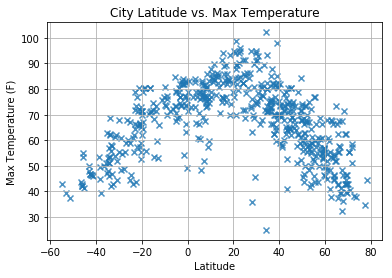

In [11]:
plt.scatter(latitude,
            max_temperature,
            edgecolor="black", linewidths=1, marker="x",
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)




#### Latitude vs. Humidity Plot

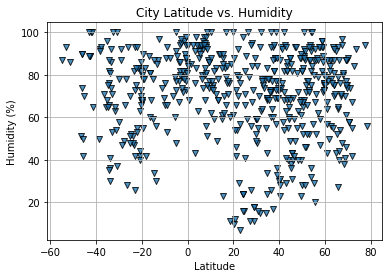

In [12]:
plt.scatter(latitude,
            humidity,
            edgecolor="black", linewidths=1, marker="v",
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)




#### Latitude vs. Cloudiness Plot

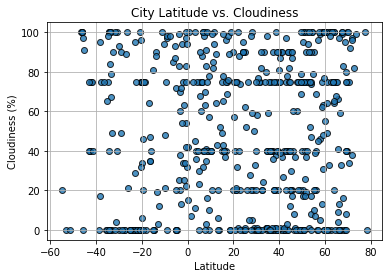

In [13]:
plt.scatter(latitude,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


#### Latitude vs. Wind Speed Plot

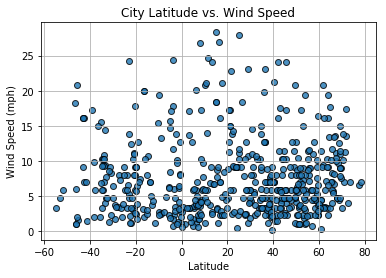

In [10]:
plt.scatter(latitude,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
